In [1]:
!pip install pandas
!pip install networkx
!pip install matplotlib
!pip install community
!pip install collections

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tz


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/38/e9/5f72929373e1a0e8d142a130f3f97e6ff920070f87f91c4e13e40e0fba5a/networkx-3.3-py3-none-any.whl.metadata
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7d/ca/e7bd1876a341ed8c456095962a582696cac1691cb6e55bd5ead15a755c5d/matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/78/38/a046bb0ebce6f530175d434e7364149e338ffe1069ee286ed8ba7f6481ee/contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/56/85/0a77382e3dd8528d7f13ee97415c82b36c487902


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for Flask from https://files.pythonhosted.org/packages/61/80/ffe1da13ad9300f87c93af113edd0638c75138c42a0994becfacac078c06/flask-3.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for Werkzeug>=3.0.0 from https://files.pythonhosted.org/packages/e3/23/c9843d7550092ae7ad380611c238f44afef66f58f76c1dab7dcf313e4339/werkzeug-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for itsdangerous>=2.1.2 from https://files.pythonhosted.org/packages/04/96/92447566d16df59b2a776c0fb82dbc4d9e07cd95062562af01e408583fc4/itsdangerous-2.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for click>=8.1.3


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Step 1: Read the each csv file into the data frame and combine them
import pandas as pd
import os

# Directory containing your CSV files
directory = 'linkedin-data'

# List to store dataframes
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if it's a CSV file
        file_path = os.path.join(directory, filename)  # Full path to the file
        df = pd.read_csv(file_path, skiprows=3)  # Read CSV into dataframe, skipping first three rows
        dfs.append(df)  # Append dataframe to list

# Concatenate all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Now combined_df contains the data from all CSV files in the directory


In [7]:
combined_df

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Fiona,Wekulo,https://www.linkedin.com/in/fiona-wekulo-a3498...,NaN,Vesen Computing Solutions,Software Developer,8-Jan-24
1,Maureen,Njihia,https://www.linkedin.com/in/maureen-njihia-981...,NaN,Seal Associates,Software Developer,18-Oct-23
2,Lugano,Edgar,https://www.linkedin.com/in/lugano-edgar-52413...,NaN,NaN,NaN,18-Oct-23
3,Robert,Wekesa,https://www.linkedin.com/in/robert-wekesa-b655...,NaN,Power Learn Project,Knowledge Manager and Head of Training,18-Oct-23
4,Njagi,Wilfred,https://www.linkedin.com/in/njagi-wilfred-987a...,NaN,Freelance,Content Writer,18-Oct-23
...,...,...,...,...,...,...,...
973,Evans,Onchagwa,https://www.linkedin.com/in/evansonchagwa,NaN,AL Yaseen Digital Solutions,Website Developer,24 Jun 2021
974,Xander,Santorini Koshell,https://www.linkedin.com/in/koshell,NaN,University Volkswagen Mazda,Sales Desk Manager,21 Jan 2021
975,NaN,NaN,NaN,NaN,NaN,NaN,13 Jan 2021
976,Clement,Mwendwa,https://www.linkedin.com/in/clementmwendwa,NaN,Microsoft,Senior Software Engineer,09 Dec 2020


In [8]:
combined_df.head(0)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On


In [11]:
# Step 2: Create a directed graph
import networkx as nx

G = nx.DiGraph()

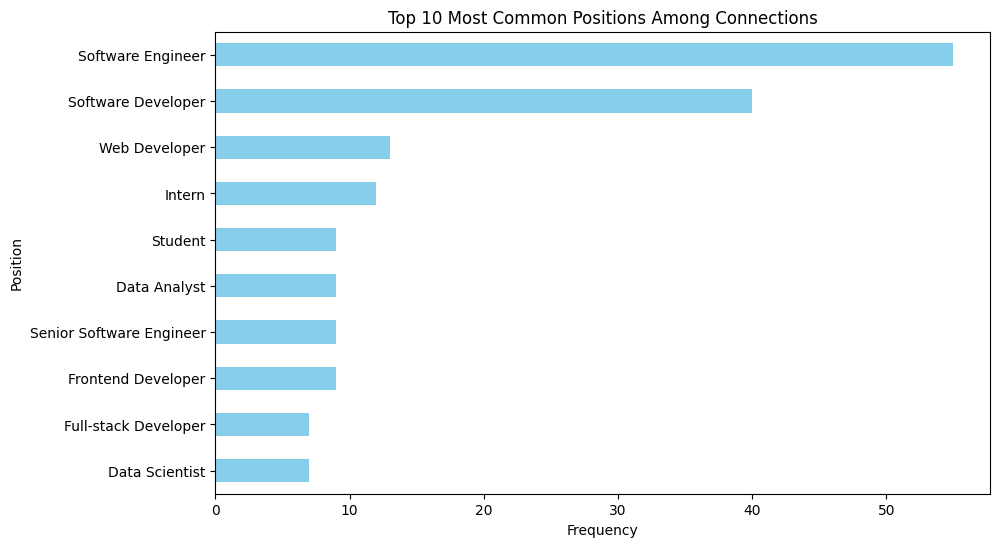

In [12]:
import matplotlib.pyplot as plt

# Plotting histogram of positions
plt.figure(figsize=(10, 6))
combined_df['Position'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Positions Among Connections')
plt.xlabel('Frequency')
plt.ylabel('Position')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common position on top
plt.show()


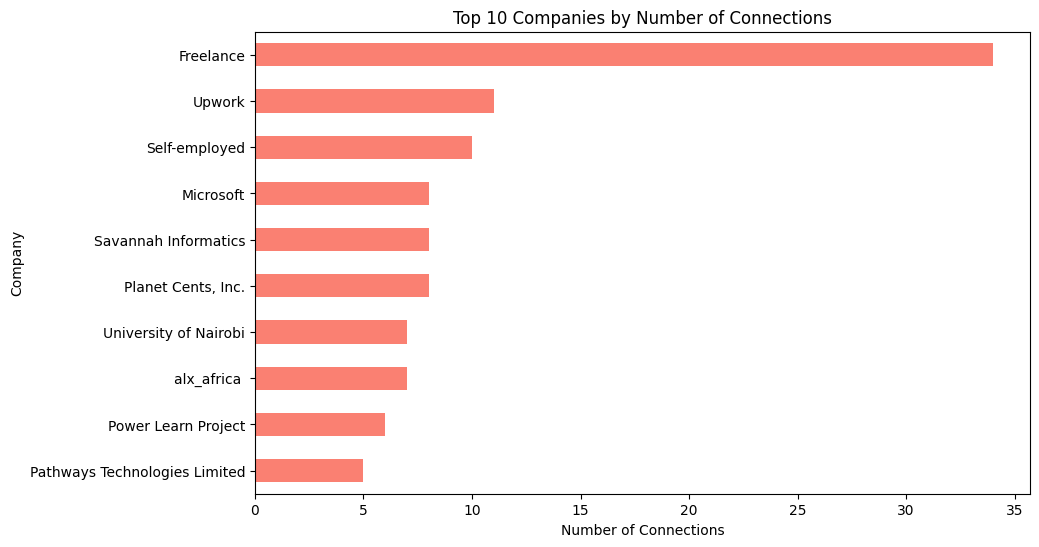

In [13]:
# Plotting top N companies by number of connections
top_n = 10  # Change this value to plot more or fewer companies
plt.figure(figsize=(10, 6))
combined_df['Company'].value_counts().head(top_n).plot(kind='barh', color='salmon')
plt.title(f'Top {top_n} Companies by Number of Connections')
plt.xlabel('Number of Connections')
plt.ylabel('Company')
plt.gca().invert_yaxis()  # Invert y-axis to have the company with the most connections on top
plt.show()


In [16]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Iterate over each row in the DataFrame and add edges to the graph
for index, row in combined_df.iterrows():
    # Handle NaN values in 'First Name' and 'Last Name' columns
    first_name = row['First Name'] if pd.notnull(row['First Name']) else ''
    last_name = row['Last Name'] if pd.notnull(row['Last Name']) else ''
    source = f"{first_name} {last_name}"
    target = row['Position']  # Assuming 'Position' represents the target
    G.add_edge(source, target)

# Compute centrality measures
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
clustering_coefficient = nx.clustering(G)

# Print the results or perform further analysis
print("Closeness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"{node}: {centrality}")

print("\nEigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

print("\nClustering Coefficient:")
for node, coefficient in clustering_coefficient.items():
    print(f"{node}: {coefficient}")


Closeness Centrality:
Fiona Wekulo: 0.0
Software Developer: 0.024886877828054297
Maureen Njihia: 0.0
Lugano Edgar: 0.0
nan: 0.10407239819004525
Robert Wekesa: 0.0
Knowledge Manager and Head of Training: 0.0007541478129713424
Njagi Wilfred: 0.0
Content Writer: 0.0015082956259426848
Absco Anyoli: 0.0
Digtal Marketining: 0.0007541478129713424
 : 0.0
Mary Arabor: 0.0
Data Analyst: 0.006033182503770739
Trixie Noela: 0.0
Student Intern: 0.0030165912518853697
Lynette Mwangi: 0.0
Product Development Intern: 0.0007541478129713424
Douglas Omega: 0.0
Intern: 0.006033182503770739
Joanne Gitari: 0.0
Sydney K. Nzunguli: 0.0
Quality Assurance: 0.0007541478129713424
Eddah Chepchirchir: 0.0
Mentee: 0.0007541478129713424
Reuben Balozi: 0.0
Software Engineer: 0.03544494720965309
THON PETER MAWUT: 0.0
Web Developer: 0.00904977375565611
Ryan Koech: 0.0
suhaib ali: 0.0
Willard Owiti: 0.0
Malvin Muthee: 0.0
Tech and Social Media Intern: 0.0015082956259426848
Jon M. Anderson: 0.0
Founder, President & CEO: 0.0

In [18]:
!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/ed/6f/ba2b2f14391291dd47d17da78c3ee644fb3a2fd6bddde664381c1968eda9/scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata
  Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl (45.9 MB)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120288 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120280 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120287 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL L}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Njihia\PyCharmProjects\Group5 Linkedin Connections\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120300 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL Y}) missing from current font.
  fig.canvas.print

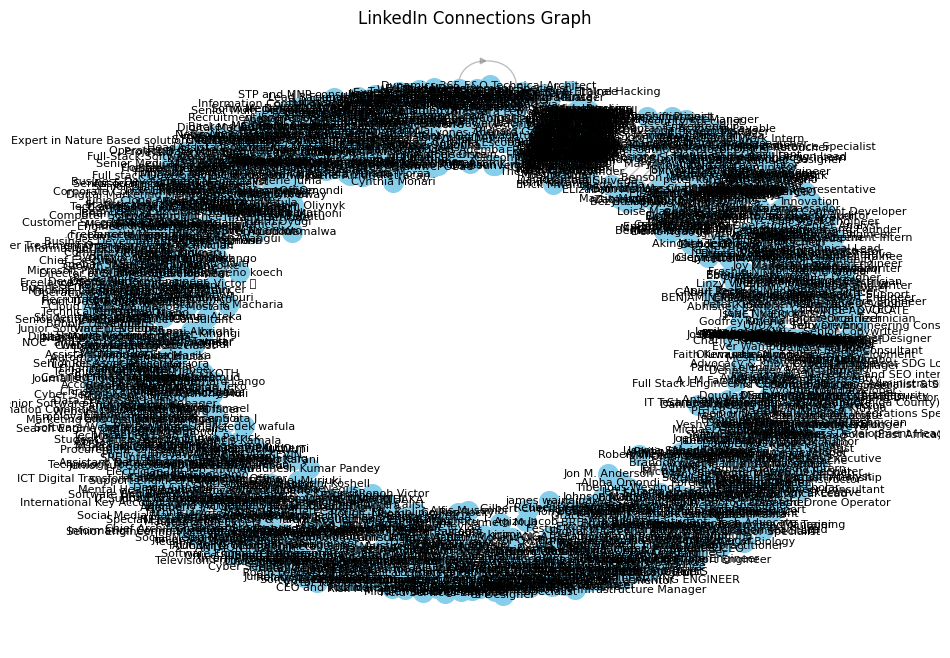

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Iterate over each row in the DataFrame and add edges to the graph
for index, row in combined_df.iterrows():
    # Handle NaN values in 'First Name' and 'Last Name' columns
    first_name = row['First Name'] if pd.notnull(row['First Name']) else ''
    last_name = row['Last Name'] if pd.notnull(row['Last Name']) else ''
    source = f"{first_name} {last_name}"
    target = row['Position']  # Assuming 'Position' represents the target
    G.add_edge(source, target)

# Compute centrality measures
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
clustering_coefficient = nx.clustering(G)

# Set node positions
pos = nx.spring_layout(G, seed=42)  # Adjust the layout algorithm as needed

# Draw the graph
plt.figure(figsize=(12, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

plt.title('LinkedIn Connections Graph')
plt.axis('off')
plt.show()


In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Iterate over each row in the DataFrame and add edges to the graph
for index, row in combined_df.iterrows():
    # Construct unique node labels and convert them to strings
    source = str(row['First Name']) + ' ' + str(row['Last Name'])
    target = str(row['Position'])  # Assuming 'Position' represents the target
    G.add_edge(source, target)

# Find communities using the Clauset-Newman-Moore greedy modularity maximization algorithm
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Print the number of communities
print("Number of communities:", len(communities))

# Print the communities in a structured format
print("\nCommunities:")
for i, community in enumerate(communities):
    print(f"\nCommunity {i + 1}:")
    for j, member in enumerate(community):
        if j % 5 == 0:  # Print 5 members per line
            print("\t", end="")
        print(member, end="\n" if (j + 1) % 5 == 0 or j == len(community) - 1 else ", ")


Number of communities: 475

Communities:

Community 1:
	Mary Mutiso , Joel Wafula, Margaret Karani, OKIYA SAVIOUR OTIENO, Harrison Mwangi
	Sylvia Kisio, Mohamed Ali Hassan, Victor Kinyua, Faith Gacheri, Branham Mwangi
	Faith Chemutai, Delight David, ian njeru, Collin Mwenda, Abigail Wachira
	nan, Oladotun Akinola, Geoffrey Nyanyuki, Laurent Namasaka, David Gichuhi
	Maureen Mwenswa, Christine  Nyaga, Geoffrey Kibiri, Suleiman Said, James Ndung'u
	Clarence Kurere, Karlmax Kalomba, Peter Kingori, posteen munishi, Mirriam Sam
	Macdonald Muhavi, Philemon Kieng, Vision l l, Martin Ndibaru, suhaib ali
	Rebecca Wakhungu, Nchore Anthony, Brian Kiprono, Joyce Njoroge, Alvin Yien
	Maskano Maskano, Kelvin Moti, Veronica Owich, Willy Angole, Robbin Ayora
	Mercy Musyoka, John Jones, Kevin Bett, Amariah Kamau, Nzangi Muoki
	Erick Mwangi, Jasper Jabiya, Morris Ngumo, John Munene, Brian Kariuki
	Edina Kwamboka, EVALYNE WAMBUI, Samuel Gitonga, Derrick  Mwangi , Rachael Muthondu
	Jerome Mberia, Kyle Muta

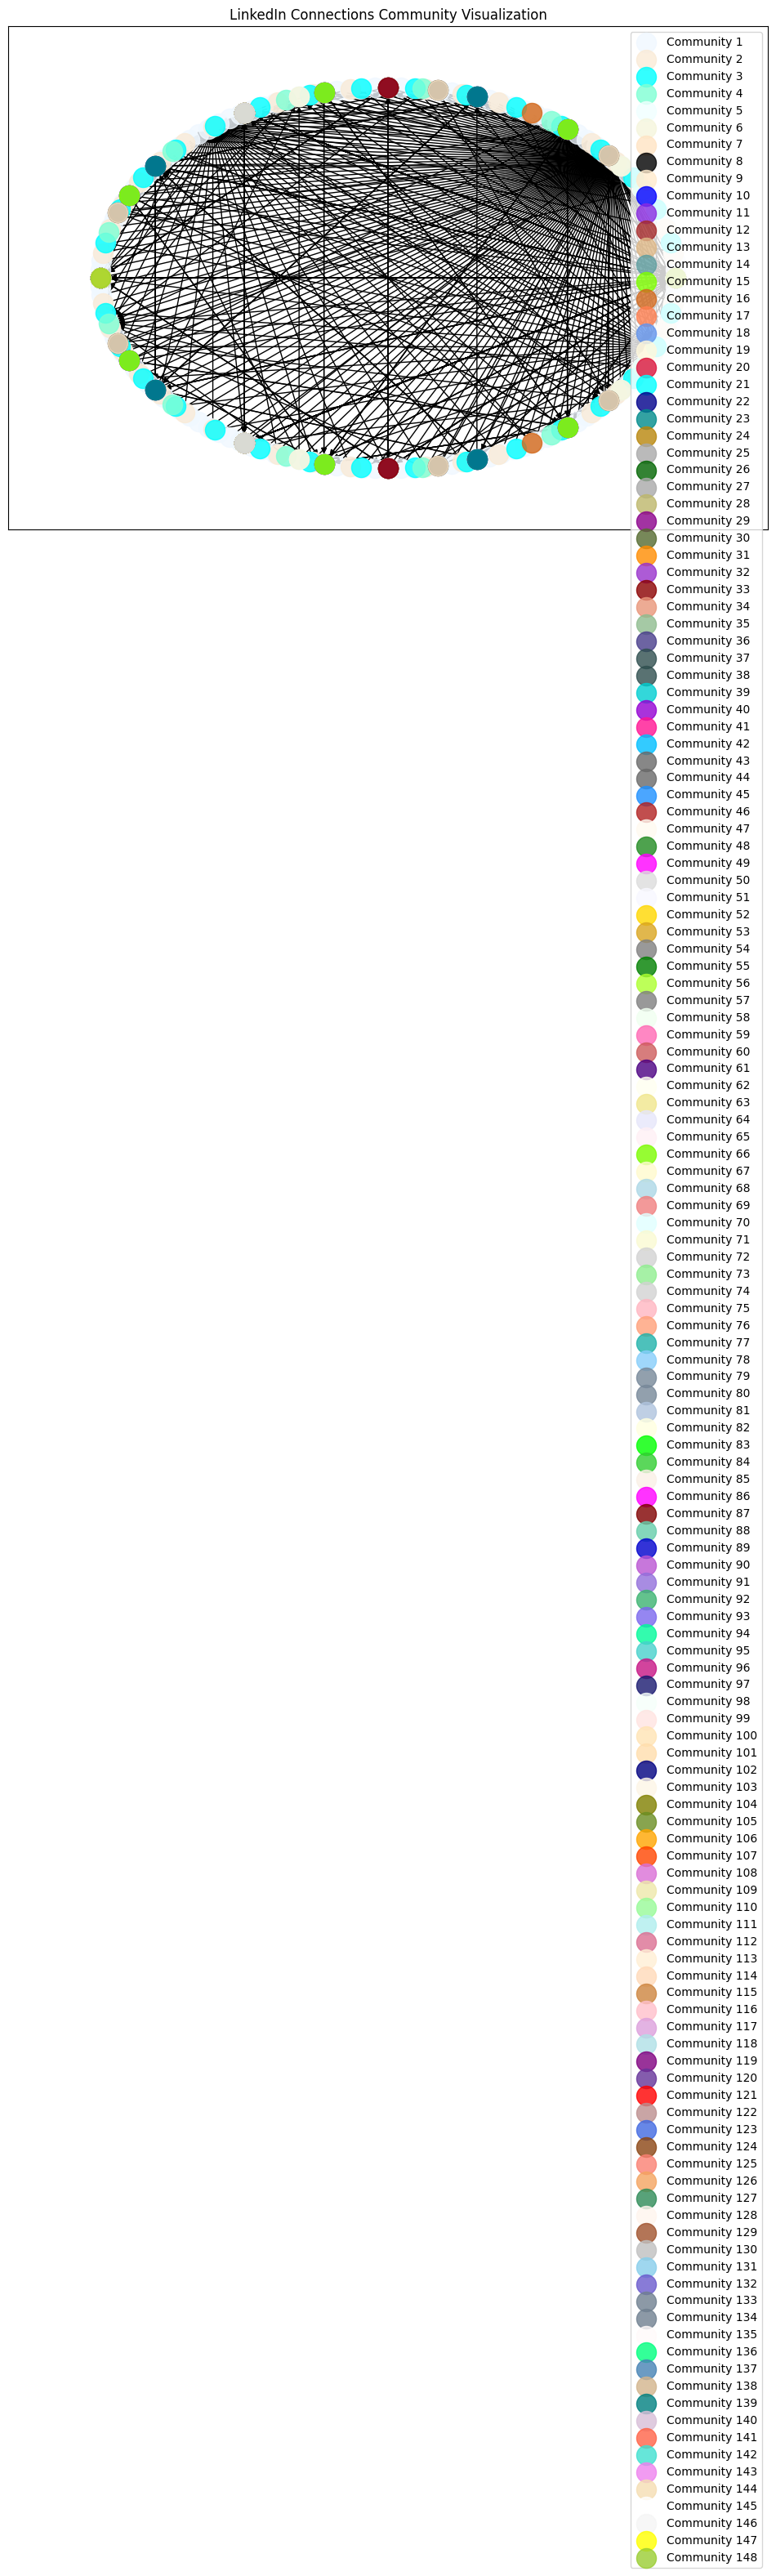

In [54]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

# Create a new figure
plt.figure(figsize=(12, 8))

# Generate a list of distinct colors for each community
num_communities = len(communities)
colors = list(mcolors.CSS4_COLORS.values())[:num_communities]

# Iterate over each community
for i, (community, color) in enumerate(zip(communities, colors), start=1):
    # Create a subgraph for the community
    community_graph = G.subgraph(community)
    
    # Set node positions using a circular layout for better separation
    pos = nx.circular_layout(community_graph)
    
    # Draw nodes with community-specific color
    nx.draw_networkx_nodes(community_graph, pos, node_color=color, node_size=300, alpha=0.8, label=f"Community {i}")

    # Filter edges to include only those within the current community
    edges_community = [(u, v) for u, v in community_graph.edges() if u in community and v in community]
    
    # Draw edges within the community
    nx.draw_networkx_edges(community_graph, pos, edgelist=edges_community)

# Add a title and legend
plt.title("LinkedIn Connections Community Visualization")
plt.legend(loc='upper right')

# Adjust plot margins
plt.margins(0.1)

# Display the plot
plt.show()


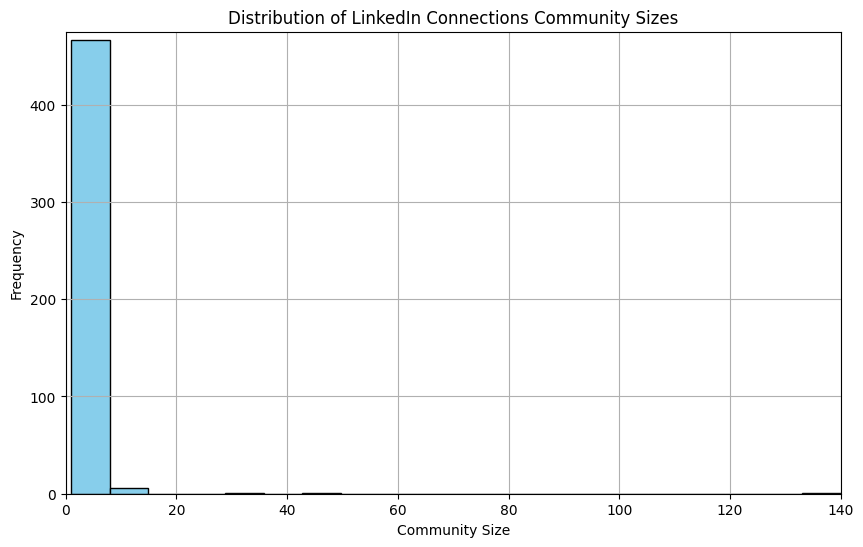

In [44]:
import matplotlib.pyplot as plt

# Assuming you have already detected communities and stored them in the variable 'communities'

# Calculate the sizes of all communities
community_sizes = [len(community) for community in communities]

# Create a histogram of community sizes with reduced scale on both axes
plt.figure(figsize=(10, 6))
plt.hist(community_sizes, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Community Size')
plt.ylabel('Frequency')
plt.title('Distribution of LinkedIn Connections Community Sizes')
plt.grid(True)

# Set limits for the x-axis and y-axis
plt.xlim(0, max(community_sizes))
plt.ylim(0, len(community_sizes))

plt.show()


In [46]:
# Assuming you have already detected communities and stored them in the variable 'communities'

# Iterate over each community
for i, community in enumerate(communities, start=1):
    print(f"Community {i} titles:")
    for member in community:
        titles = combined_df.loc[combined_df['First Name'] + ' ' + combined_df['Last Name'] == member, 'Position']
        print("\t", titles.values)


Community 1 titles:
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 []
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan nan]
	 [nan]
	 [nan]
	 [nan nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan 'Director']
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan nan]
	 [nan]
	 [nan]
	 [nan]
	 [nan]


In [58]:
# Print each community and their members
for i, community_nodes in enumerate(communities):
    community_name = f"community_{i}"
    sorted_community = sorted(community_nodes)
    globals()[community_name] = sorted_community
    print(f'Community {i}: {sorted_community}')


Community 0: ['AYUSI PETER', 'Abdimalik Hassan', 'Abigail Wachira', 'Allan Mutai', 'Alvin Yien', 'Amariah Kamau', 'Angela Mawia', 'Anuj .', 'Aurelia Jemutai', 'Bereket Kindie', 'Bob Oyier', 'Branham Mwangi', 'Brian Kariuki', 'Brian Kiprono', 'Bryan Onyango', 'Captain Jeff,Godii', 'Cheboi Millicent', 'Christine  Nyaga', 'Clarence Kurere', 'Collin Mwenda', 'Cynthia Maina', 'Daniel Ogada', 'David Gichuhi', 'Delight David', 'Derrick  Mwangi ', 'Derrick Muturi', 'Director', 'Dominic Mwasya', 'EVALYNE WAMBUI', 'Edina Kwamboka', 'Emily Colleran', 'Erick Mwangi', 'Eston Brandon Kiama', 'Faith Chemutai', 'Faith Gacheri', 'Faith Tum', 'Faith Wambui', 'Felista Njeri', 'Geoffrey Kibiri', 'Geoffrey Nyanyuki', 'Gladys Mungai', 'Gucha Duncan', 'Harrison Mwangi', 'Harrison Thuku', 'Ian Murunga', 'Jairus Tom', 'James Ekasiba', "James Ndung'u", 'Jasper Jabiya', 'Jerome Mberia', 'Joan Kirui', 'Joel Wafula', 'John Jones', 'John Karanja', 'John Mulwa', 'John Munene', 'John Wanjala', 'Joyce Njoroge', 'KIPYE

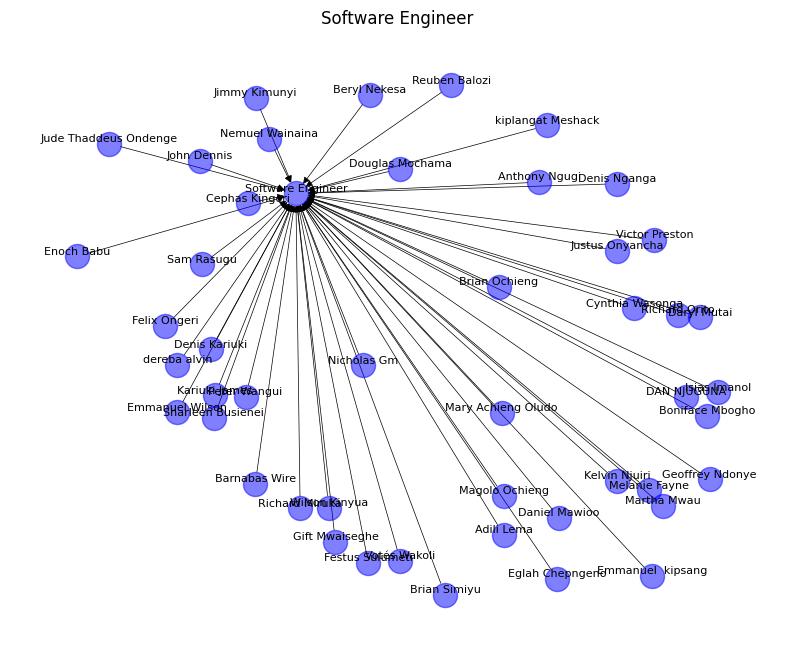

In [62]:
# Visualize Software Engineers in community_1 (Community 2)
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 8))

# Compute node positions using spring layout
pos = nx.spring_layout(G, k=0.15)  # Adjust 'k' to control the spacing between nodes

# Draw nodes with larger size for better visibility
nx.draw_networkx_nodes(G, pos, nodelist=community_1, node_color='b', alpha=0.5, node_size=300)

# Filter edges to include only those within community_1
edges_1 = [(u, v) for u, v in G.edges() if u in community_1 and v in community_1]

# Draw edges with reduced width
nx.draw_networkx_edges(G, pos, edgelist=edges_1, width=0.5)

# Draw node labels with adjusted positions and font size
node_labels = {node: node for node in community_1}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_color='black', verticalalignment='bottom')

plt.title('Software Engineer')
plt.axis('off')  # Turn off the axis
plt.show()


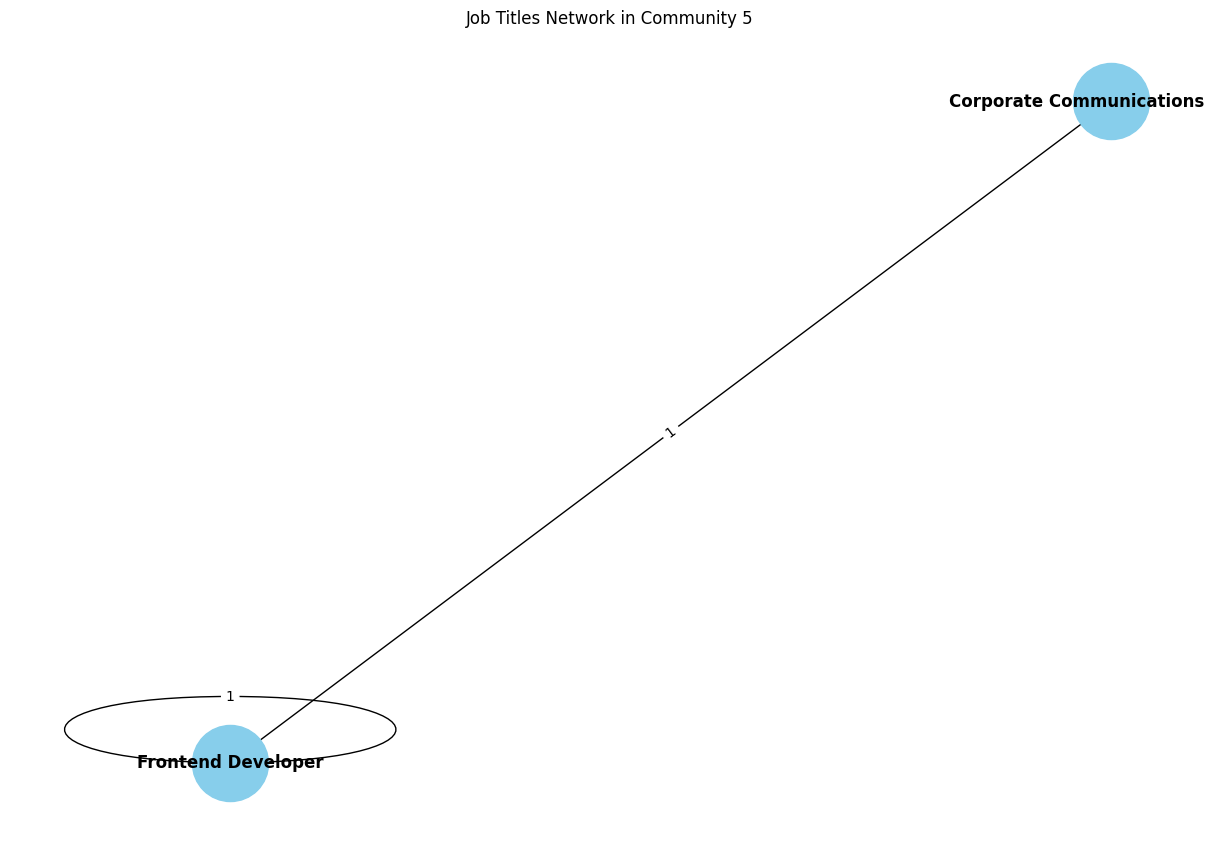

In [72]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming you have already detected communities and stored them in the variable 'communities'
# Assuming you have a DataFrame containing member information named 'combined_df'

# Concatenate first name and last name to match the format in your code snippet
combined_df['Full Name'] = combined_df['First Name'] + ' ' + combined_df['Last Name']

# Extract job titles of members in Community 6
community_5_members = community_5
community_5_job_titles = combined_df[combined_df['Full Name'].isin(community_5_members)]['Position']

# Count the occurrences of each job title
job_title_counts = community_5_job_titles.value_counts()

# Create a graph
G = nx.Graph()

# Add nodes for each job title
for job_title, count in job_title_counts.items():
    G.add_node(job_title, count=count)

# Add edges between job titles that occur together in the same community
for member in community_5_members:
    titles = combined_df.loc[combined_df['Full Name'] == member, 'Position'].values
    for i in range(len(titles)):
        for j in range(i+1, len(titles)):
            title1 = titles[i]
            title2 = titles[j]
            if G.has_edge(title1, title2):
                G[title1][title2]['weight'] += 1
            else:
                G.add_edge(title1, title2, weight=1)


# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15)  # Adjust 'k' to control the spacing between nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Job Titles Network in Community 5')
plt.axis('off')
plt.show()
